# ResNet50
VGG16
VGG19
InceptionV3
Inception
ResNet V2
MobileNet
MobileNetV2
DenseNet121
DenseNet169
DenseNet201
ResNet50V2
ResNet101V2
ResNet152V2
Covid-19 Diagnoise based on Chest x-ray 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow
tensorflow.__version__

'2.4.1'

In [3]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [4]:
#SEARCHING FOR P100
import os
import time
x=!nvidia-smi
count=0
for i in x:
    if "============" in i:
        count+=1
        break
    count+=1
if 'p100' in x[count].lower():
    print("found")
else:
    print(x[count])
    time.sleep(1)
    #os._exit(00)

|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |


In [ ]:
import tensorflow
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1763108301736669748
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14674281152
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3976410313293682268
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [6]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/Covid/Data/train'
test_path = '/content/drive/MyDrive/Covid/Data/test'

In [7]:
# Scaling all the images between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Data/train',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Data/test',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 47 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


# **ResNet50**

In [9]:
resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [10]:
for layer in resnet.layers:
  layer.trainable = False

In [11]:
folder = glob('/content/drive/MyDrive/Covid/*')
folder

['/content/drive/MyDrive/Covid/Data',
 '/content/drive/MyDrive/Covid/covid_chest_xray_model_transfer_learning.h5',
 '/content/drive/MyDrive/Covid/Notebook.ipynb']

In [12]:
x = Flatten()(resnet.output)

In [13]:
prediction = Dense(3, activation='softmax')(x)

In [14]:
model = Model(inputs = resnet.inputs, outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [15]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = model.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=1, validation_steps=1,callbacks=[callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1/1 [==============================] - 58s 58s/step - loss: 1.2052 - accuracy: 0.4000 - val_loss: 9.7193 - val_accuracy: 0.5312
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 15.0387 - accuracy: 0.2667 - val_loss: 3.3386 - val_accuracy: 0.6562
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 6.3069 - accuracy: 0.4000 - val_loss: 4.2661 - val_accuracy: 0.3125
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 2.8419 - accuracy: 0.5333 - val_loss: 7.6598 - val_accuracy: 0.0625


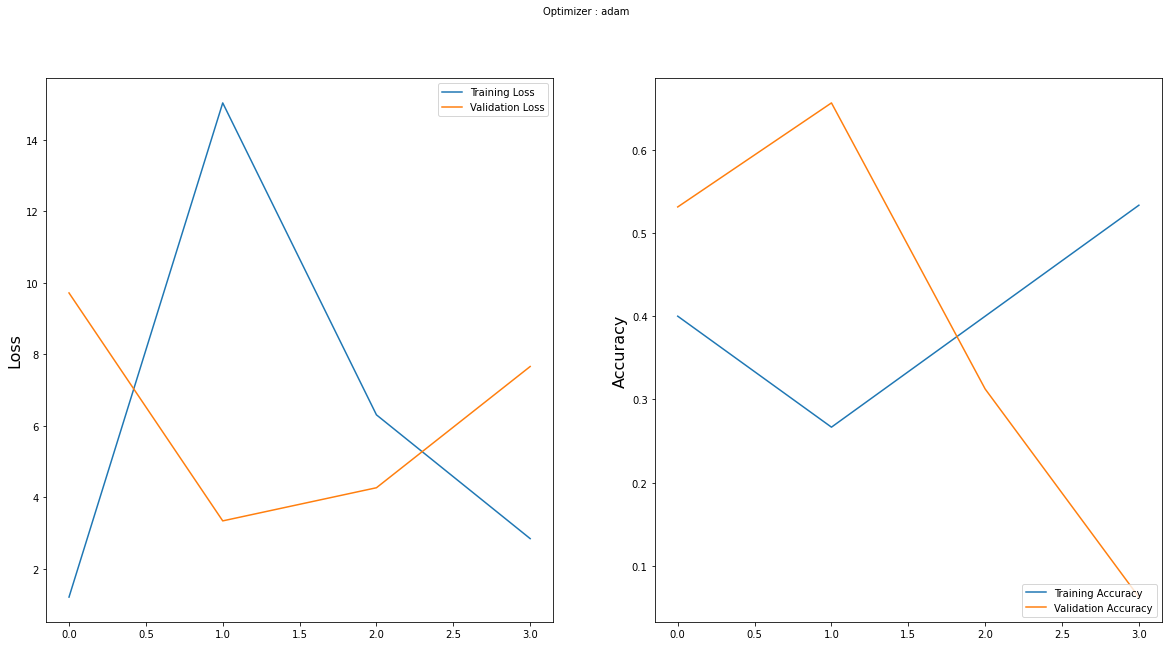

In [17]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_p=model.predict(test_set,verbose=1,steps=len(test_set))
y_pr=np.argmax(y_p,axis=1)
cm1=confusion_matrix(test_set.classes,y_pr)
total1=sum(sum(cm1))
#from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print(classification_report(test_set.classes, y_pr))

2/2 [==============================] - 0s 148ms/step
Accuracy :  0.44680851063829785
Sensitivity :  0.7142857142857143
Specificity :  0.2857142857142857
              precision    recall  f1-score   support

           0       0.45      0.71      0.56        21
           1       0.43      0.29      0.34        21
           2       0.00      0.00      0.00         5

    accuracy                           0.45        47
   macro avg       0.29      0.33      0.30        47
weighted avg       0.39      0.45      0.40        47



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **For InceptionV3 with optimiser adam**

In [18]:
# create the base pre-trained model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x2 = base_model.output
x2 = GlobalAveragePooling2D()(x2)

87916544/87910968 [==============================] - 1s 0us/step


In [19]:
predictions = Dense(3, activation='softmax')(x2)

# this is the model we will train
models = Model(inputs=base_model.input, outputs=predictions)
models.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [21]:
models.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = models.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
2/2 [==============================] - 9s 4s/step - loss: 1.1973 - accuracy: 0.4757 - val_loss: 0.8563 - val_accuracy: 0.6515
Epoch 2/20
2/2 [==============================] - 2s 2s/step - loss: 0.9192 - accuracy: 0.4738 - val_loss: 0.6860 - val_accuracy: 0.7879
Epoch 3/20
2/2 [==============================] - 2s 1s/step - loss: 0.7028 - accuracy: 0.7748 - val_loss: 0.6093 - val_accuracy: 0.8030
Epoch 4/20
2/2 [==============================] - 2s 2s/step - loss: 0.5697 - accuracy: 0.8199 - val_loss: 0.6369 - val_accuracy: 0.7424
Epoch 5/20
2/2 [==============================] - 2s 2s/step - loss: 0.5396 - accuracy: 0.8260 - val_loss: 0.5556 - val_accuracy: 0.7879
Epoch 6/20
2/2 [==============================] - 2s 1s/step - loss: 0.3510 - accuracy: 0.9069 - val_loss: 0.4869 - val_accuracy: 0.8182
Epoch 7/20
2/2 [==============================] - 2s 2s/step - loss: 0.3303 - accuracy: 0.9210 - val_loss: 0.4242 - val_accuracy: 0.8485
Epoch 8/20
2/2 [=========================

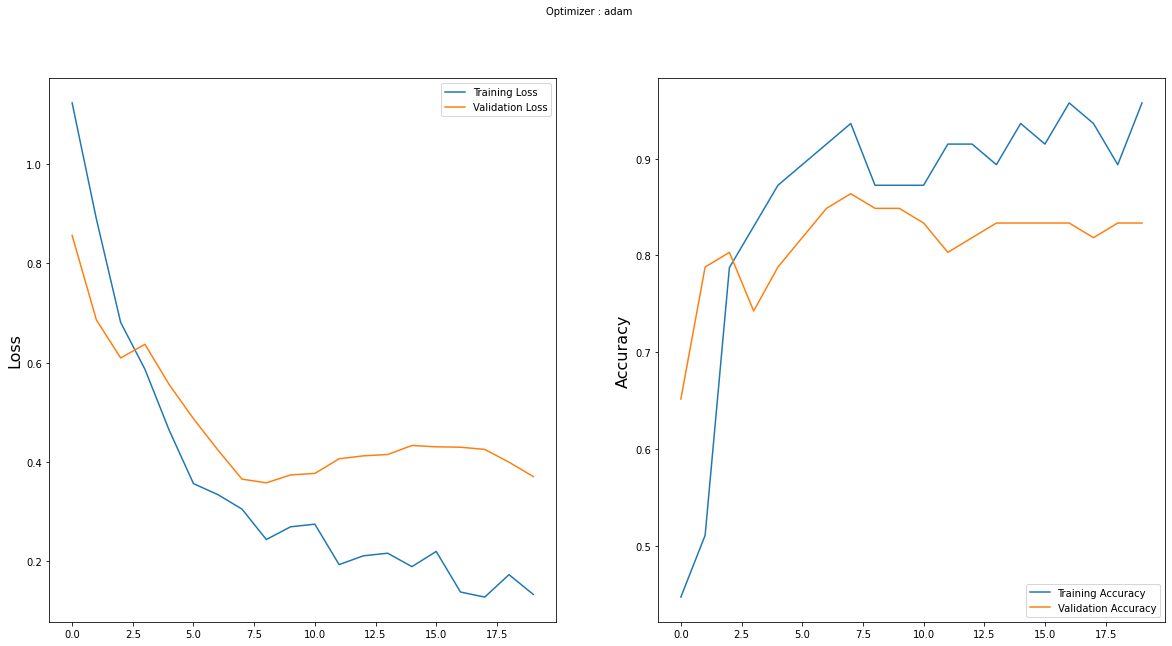

In [ ]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()S

# **with rmsprop and default learning rate optimiser**

In [23]:
models.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = models.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
2/2 [==============================] - 7s 2s/step - loss: 0.2283 - accuracy: 0.9574 - val_loss: 0.3297 - val_accuracy: 0.8333
Epoch 2/20
2/2 [==============================] - 2s 2s/step - loss: 0.4359 - accuracy: 0.8199 - val_loss: 0.4159 - val_accuracy: 0.8636
Epoch 3/20
2/2 [==============================] - 2s 2s/step - loss: 0.1254 - accuracy: 0.9574 - val_loss: 0.5956 - val_accuracy: 0.7727
Epoch 4/20
2/2 [==============================] - 2s 1s/step - loss: 0.2039 - accuracy: 0.8978 - val_loss: 0.6243 - val_accuracy: 0.7727
Epoch 5/20
2/2 [==============================] - 2s 1s/step - loss: 0.1076 - accuracy: 0.9716 - val_loss: 0.3836 - val_accuracy: 0.8333
Epoch 6/20
2/2 [==============================] - 2s 2s/step - loss: 0.1480 - accuracy: 0.9574 - val_loss: 0.4636 - val_accuracy: 0.8030


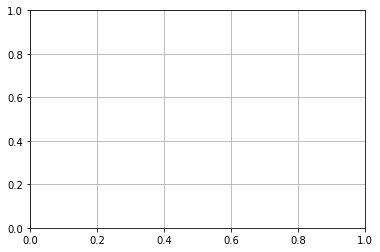

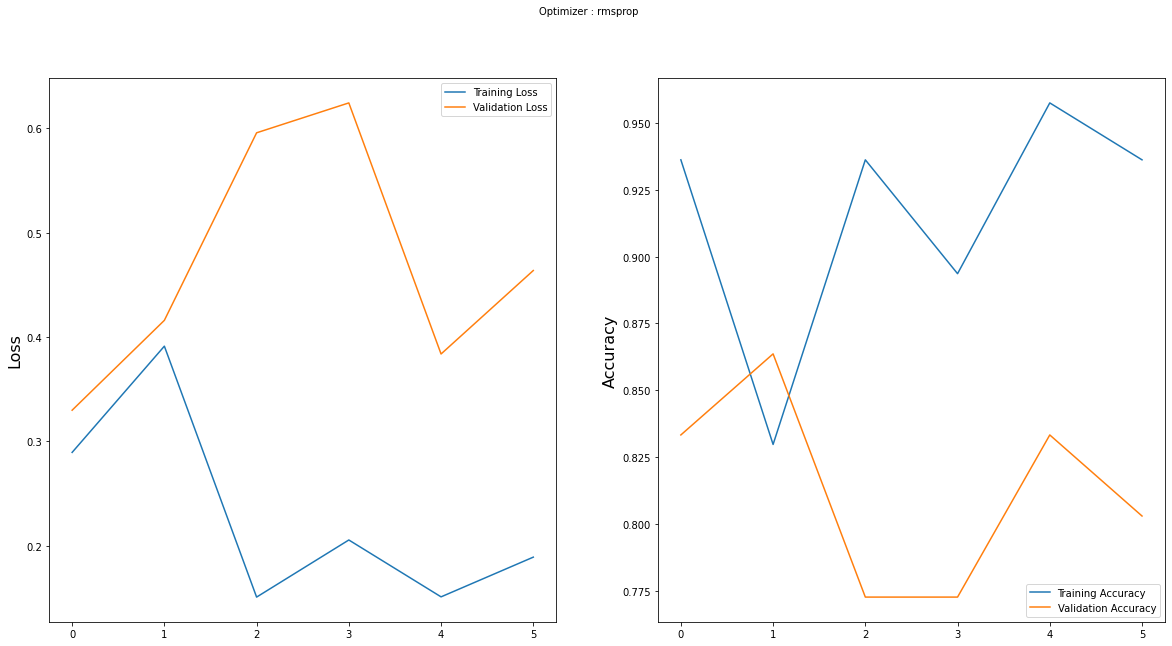

In [24]:
import matplotlib.pyplot as plt

x=hist
ax = plt.axes()        
ax.yaxis.grid() # horizontal lines
ax.xaxis.grid()
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : rmsprop', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_p=models.predict(test_set,verbose=1,steps=len(test_set))
y_pr=np.argmax(y_p,axis=1)
cm1=confusion_matrix(test_set.classes,y_pr)
total1=sum(sum(cm1))
#from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print(classification_report(test_set.classes, y_pr))

2/2 [==============================] - 0s 157ms/step
Accuracy :  0.46808510638297873
Sensitivity :  0.42857142857142855
Specificity :  0.6842105263157895
              precision    recall  f1-score   support

           0       0.53      0.43      0.47        21
           1       0.46      0.62      0.53        21
           2       0.00      0.00      0.00         5

    accuracy                           0.47        47
   macro avg       0.33      0.35      0.33        47
weighted avg       0.44      0.47      0.45        47



# **FOR VGG16**

In [25]:
vgg16=VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [26]:
x1= Flatten()(vgg16.output)
prediction1 = Dense(3, activation='softmax')(x1)
model1 = Model(inputs = vgg16.inputs, outputs = prediction1)
model1.summary()
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [27]:
r1 = model1.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
2/2 [==============================] - 19s 12s/step - loss: 2.2016 - accuracy: 0.5201 - val_loss: 4.3425 - val_accuracy: 0.3182
Epoch 2/20
2/2 [==============================] - 2s 2s/step - loss: 2.8672 - accuracy: 0.3522 - val_loss: 1.0033 - val_accuracy: 0.2879
Epoch 3/20
2/2 [==============================] - 2s 2s/step - loss: 1.0115 - accuracy: 0.4534 - val_loss: 1.1313 - val_accuracy: 0.3182
Epoch 4/20
2/2 [==============================] - 2s 2s/step - loss: 2.4886 - accuracy: 0.4312 - val_loss: 1.3249 - val_accuracy: 0.6061
Epoch 5/20
2/2 [==============================] - 2s 1s/step - loss: 1.7540 - accuracy: 0.4049 - val_loss: 1.2773 - val_accuracy: 0.3182
Epoch 6/20
2/2 [==============================] - 2s 1s/step - loss: 1.1054 - accuracy: 0.4750 - val_loss: 1.0158 - val_accuracy: 0.3182
Epoch 7/20
2/2 [==============================] - 2s 2s/step - loss: 1.1276 - accuracy: 0.4170 - val_loss: 0.9686 - val_accuracy: 0.6061
Epoch 8/20
2/2 [=======================

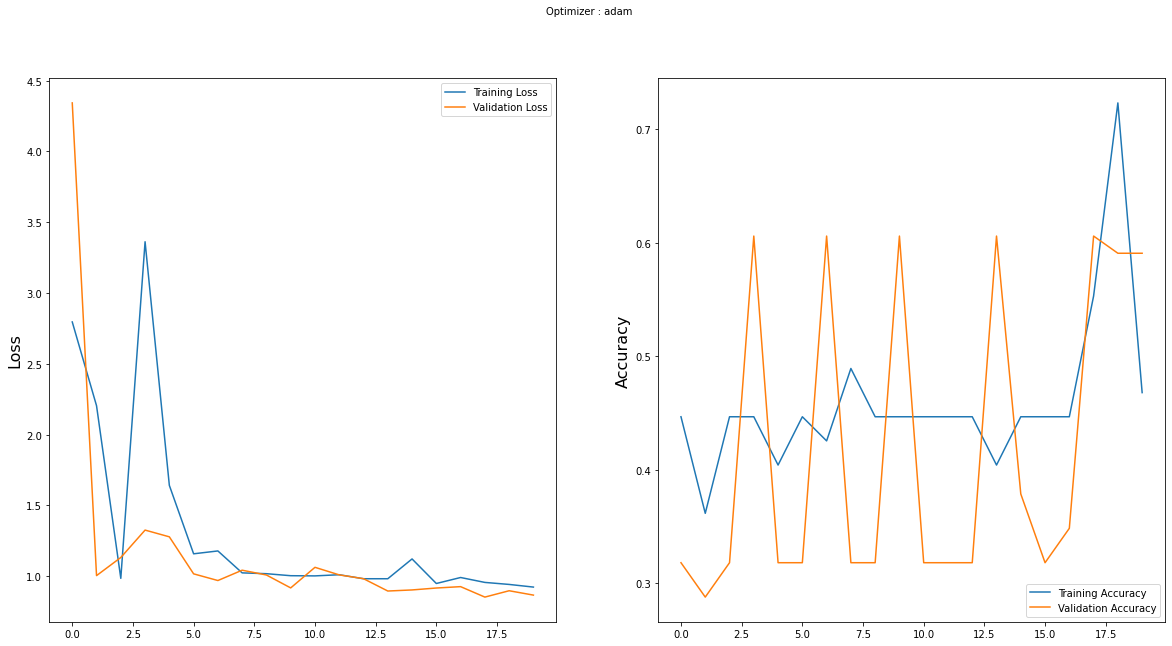

In [28]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **VGG19**

In [29]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
vgg19=VGG19(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 0s 0us/step


In [30]:
x11= Flatten()(vgg19.output)
prediction11 = Dense(3, activation='softmax')(x11)
model11 = Model(inputs = vgg19.inputs, outputs = prediction11)
model11.summary()
model11.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [31]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = model11.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
2/2 [==============================] - 4s 2s/step - loss: 9.9812 - accuracy: 0.4437 - val_loss: 0.8574 - val_accuracy: 0.6061
Epoch 2/20
2/2 [==============================] - 2s 1s/step - loss: 0.9973 - accuracy: 0.4437 - val_loss: 0.9013 - val_accuracy: 0.6515
Epoch 3/20
2/2 [==============================] - 2s 1s/step - loss: 0.9565 - accuracy: 0.4541 - val_loss: 2.2399 - val_accuracy: 0.3182
Epoch 4/20
2/2 [==============================] - 2s 2s/step - loss: 1.5255 - accuracy: 0.4028 - val_loss: 0.8561 - val_accuracy: 0.6061
Epoch 5/20
2/2 [==============================] - 2s 2s/step - loss: 1.0801 - accuracy: 0.4534 - val_loss: 0.9147 - val_accuracy: 0.4394
Epoch 6/20
2/2 [==============================] - 2s 1s/step - loss: 0.9624 - accuracy: 0.5459 - val_loss: 1.0123 - val_accuracy: 0.3182


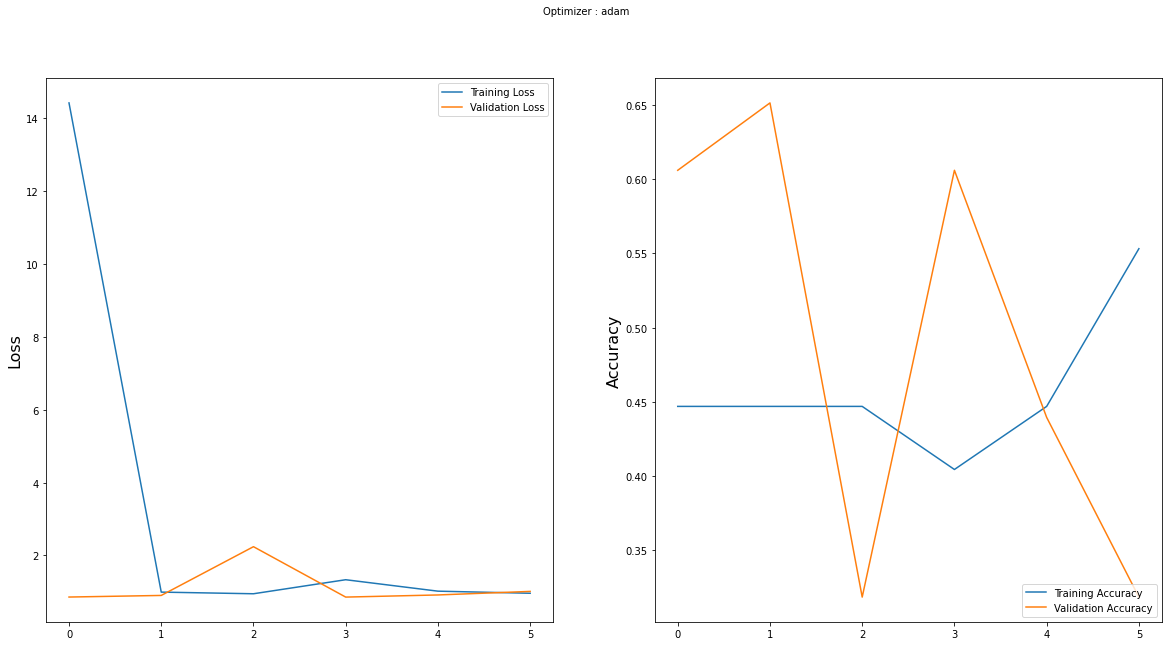

In [32]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


# **INCEPTION RESNET V2**

In [33]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
inc=InceptionResNetV2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

219062272/219055592 [==============================] - 1s 0us/step


In [34]:
x3 = Flatten()(inc.output)
predictionss = Dense(3, activation='softmax')(x3)

In [35]:
modelss = Model(inputs = inc.inputs, outputs = predictionss)
modelss.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [36]:
modelss.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r2 = modelss.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))
x=r2

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
2/2 [==============================] - 24s 7s/step - loss: 4.4593 - accuracy: 0.2430 - val_loss: 5.1520 - val_accuracy: 0.4091
Epoch 2/20
2/2 [==============================] - 3s 2s/step - loss: 1.8607 - accuracy: 0.7570 - val_loss: 3.6782 - val_accuracy: 0.7727
Epoch 3/20
2/2 [==============================] - 3s 1s/step - loss: 1.0020 - accuracy: 0.8799 - val_loss: 2.7479 - val_accuracy: 0.5303
Epoch 4/20
2/2 [==============================] - 3s 2s/step - loss: 0.7663 - accuracy: 0.8927 - val_loss: 9.4095 - val_accuracy: 0.0909
Epoch 5/20
2/2 [==============================] - 3s 1s/step - loss: 1.2240 - accuracy: 0.6310 - val_loss: 6.8332 - val_accuracy: 0.6061
Epoch 6/20
2/2 [==============================] - 3s 1s/step - loss: 0.6966 - accuracy: 0.9574 - val_loss: 8.4914 - val_accuracy: 0.6061
Epoch 7/20
2/2 [==============================] - 3s 1s/step - loss: 0.1151 - accuracy: 0.9612 - val_loss: 4.8978 - val_accuracy: 0.6212
Epoch 8/20
2/2 [========================

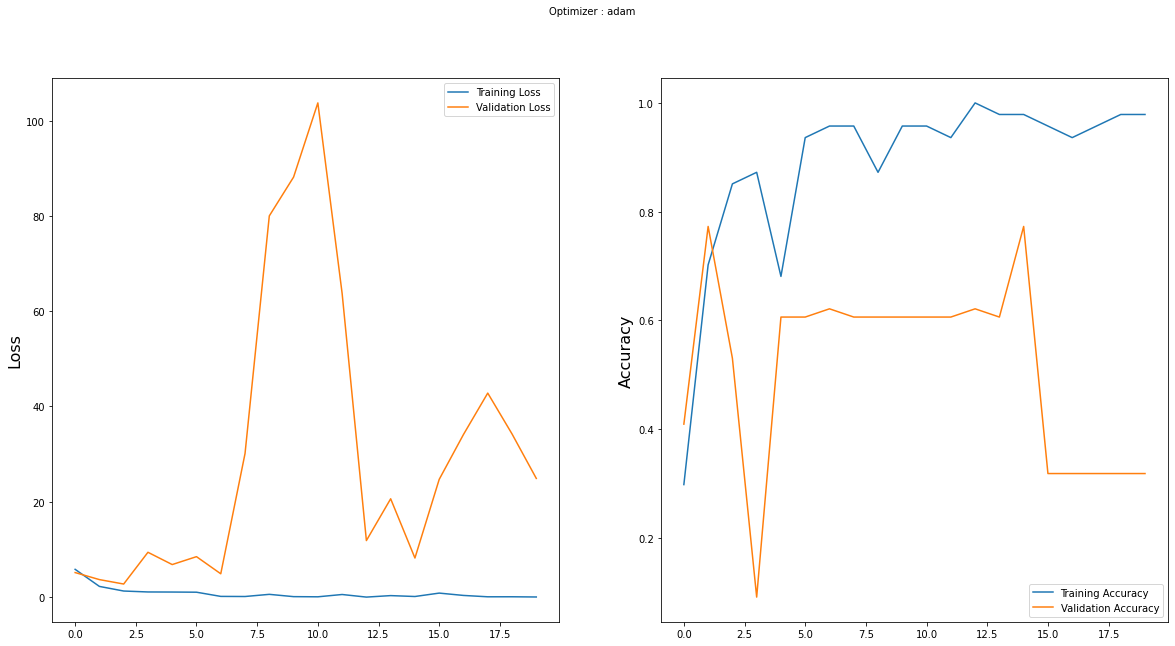

In [37]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **MobileNet**

In [39]:
from tensorflow.keras.applications import MobileNet, MobileNetV2
mob = MobileNet(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

17227776/17225924 [==============================] - 0s 0us/step


In [40]:
x1= Flatten()(mob.output)
prediction1 = Dense(3, activation='softmax')(x1)
model12 = Model(inputs = mob.inputs, outputs = prediction1)
model12.summary()
model12.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [41]:
r1 = model12.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
2/2 [==============================] - 6s 3s/step - loss: 3.1281 - accuracy: 0.5650 - val_loss: 8.2871 - val_accuracy: 0.4545
Epoch 2/20
2/2 [==============================] - 2s 2s/step - loss: 1.8263 - accuracy: 0.8785 - val_loss: 3.4894 - val_accuracy: 0.8182
Epoch 3/20
2/2 [==============================] - 2s 1s/step - loss: 1.0587 - accuracy: 0.8279 - val_loss: 1.6924 - val_accuracy: 0.9242
Epoch 4/20
2/2 [==============================] - 2s 1s/step - loss: 0.3581 - accuracy: 0.9494 - val_loss: 2.1112 - val_accuracy: 0.9091
Epoch 5/20
2/2 [==============================] - 2s 2s/step - loss: 4.1744e-04 - accuracy: 1.0000 - val_loss: 2.3870 - val_accuracy: 0.9091
Epoch 6/20
2/2 [==============================] - 2s 1s/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 2.6668 - val_accuracy: 0.8333
Epoch 7/20
2/2 [==============================] - 2s 1s/step - loss: 1.3127 - accuracy: 0.8908 - val_loss: 1.8333 - val_accuracy: 0.8788
Epoch 8/20
2/2 [=====================

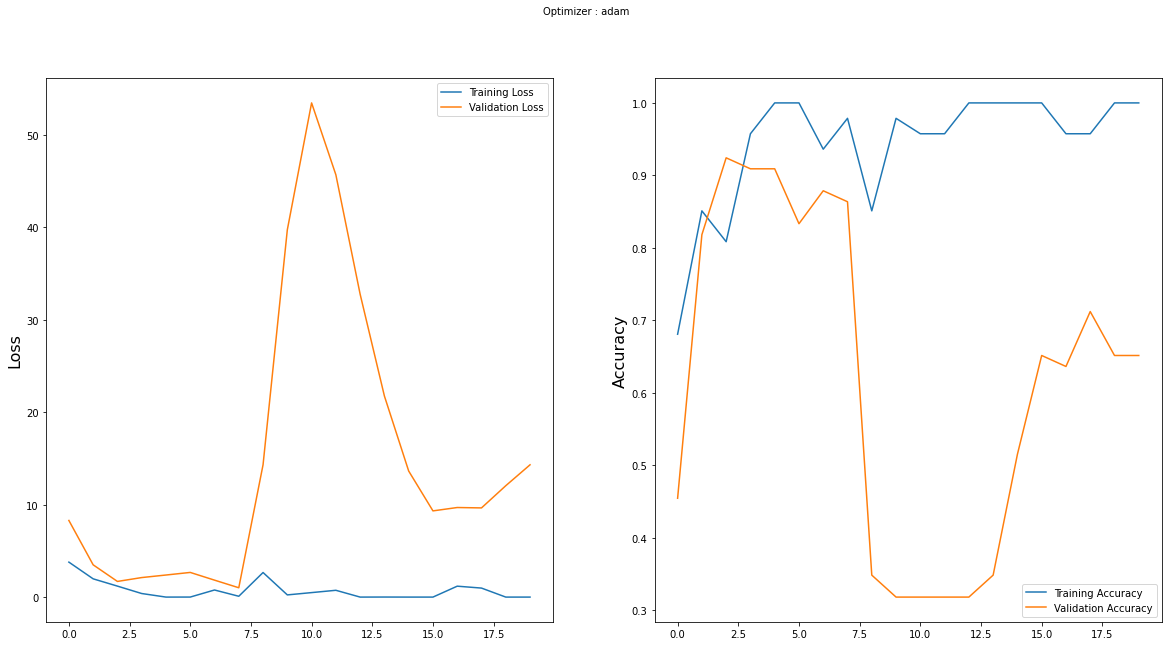

In [42]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **MobileNetV2**

In [43]:
mob1 = MobileNetV2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

9412608/9406464 [==============================] - 0s 0us/step


In [44]:
x1= Flatten()(mob1.output)
prediction1 = Dense(3, activation='softmax')(x1)
model13 = Model(inputs = mob1.inputs, outputs = prediction1)
model13.summary()
model13.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [45]:
r1 = model13.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
2/2 [==============================] - 8s 3s/step - loss: 1.9442 - accuracy: 0.3424 - val_loss: 5.2006 - val_accuracy: 0.7273
Epoch 2/20
2/2 [==============================] - 2s 2s/step - loss: 6.3068 - accuracy: 0.8340 - val_loss: 2.5987 - val_accuracy: 0.9091
Epoch 3/20
2/2 [==============================] - 2s 2s/step - loss: 2.0130 - accuracy: 0.8482 - val_loss: 2.8114 - val_accuracy: 0.8333
Epoch 4/20
2/2 [==============================] - 2s 2s/step - loss: 0.0393 - accuracy: 0.9858 - val_loss: 3.9770 - val_accuracy: 0.8030
Epoch 5/20
2/2 [==============================] - 2s 2s/step - loss: 0.0746 - accuracy: 0.9716 - val_loss: 5.1526 - val_accuracy: 0.8030
Epoch 6/20
2/2 [==============================] - 2s 962ms/step - loss: 0.2115 - accuracy: 0.9470 - val_loss: 5.9542 - val_accuracy: 0.8182
Epoch 7/20
2/2 [==============================] - 2s 2s/step - loss: 0.1964 - accuracy: 0.9352 - val_loss: 6.4484 - val_accuracy: 0.8485
Epoch 8/20
2/2 [======================

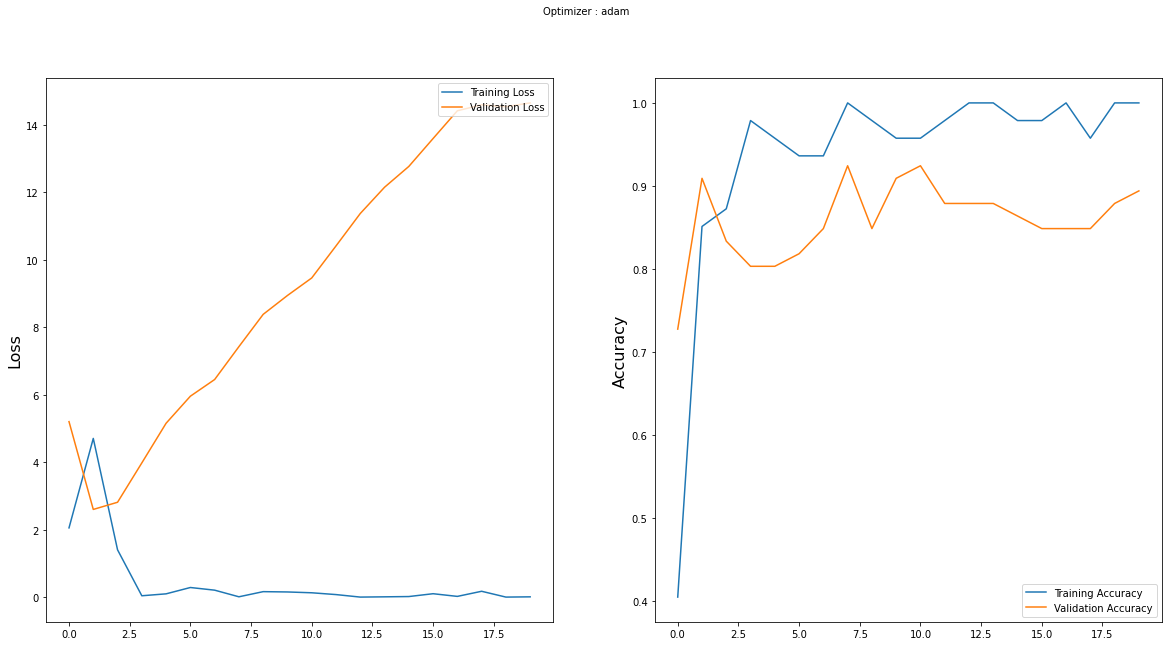

In [46]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **DenseNet121**

In [47]:
from tensorflow.keras.applications import DenseNet121, DenseNet169, DenseNet201, ResNet50V2,ResNet101V2,ResNet152V2

In [48]:
des121=DenseNet121(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

29089792/29084464 [==============================] - 0s 0us/step


In [49]:
x1= Flatten()(des121.output)
prediction1 = Dense(3, activation='softmax')(x1)
model1 = Model(inputs = des121.inputs, outputs = prediction1)
model1.summary()
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [50]:
r1 = model1.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
2/2 [==============================] - 20s 8s/step - loss: 3.1715 - accuracy: 0.6175 - val_loss: 4.3210 - val_accuracy: 0.5152
Epoch 2/20
2/2 [==============================] - 2s 2s/step - loss: 1.9385 - accuracy: 0.7835 - val_loss: 2.0733 - val_accuracy: 0.6970
Epoch 3/20
2/2 [==============================] - 2s 1s/step - loss: 0.1924 - accuracy: 0.9262 - val_loss: 2.2982 - val_accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 2s 2s/step - loss: 0.0962 - accuracy: 0.9858 - val_loss: 4.5326 - val_accuracy: 0.1667
Epoch 5/20
2/2 [==============================] - 2s 2s/step - loss: 0.2289 - accuracy: 0.9858 - val_loss: 11.2895 - val_accuracy: 0.1818
Epoch 6/20
2/2 [==============================] - 2s 2s/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 17.1461 - val_accuracy: 0.2424
Epoch 7/20
2/2 [==============================] - 2s 2s/step - loss: 0.2805 - accuracy: 0.9210 - val_loss: 18.1747 - val_accuracy: 0.3333
Epoch 8/20
2/2 [=====================

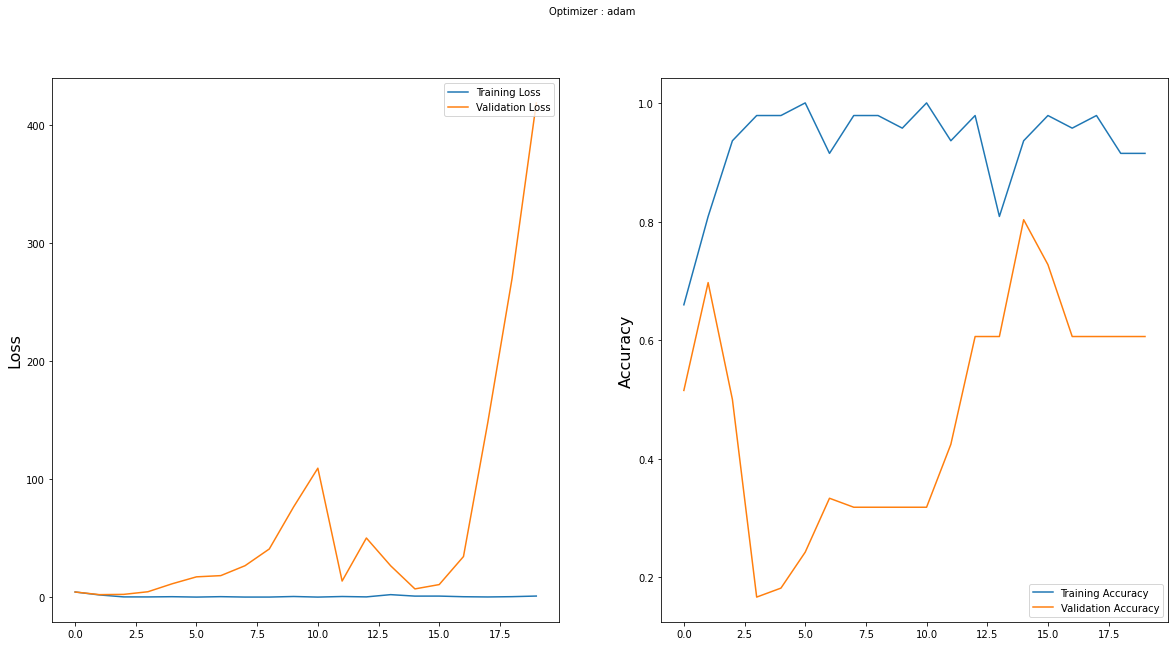

In [51]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **DenseNet169**

In [52]:
des169=DenseNet169(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

51879936/51877672 [==============================] - 0s 0us/step


In [53]:
x1= Flatten()(des169.output)
prediction1 = Dense(3, activation='softmax')(x1)
model1 = Model(inputs = des169.inputs, outputs = prediction1)
model1.summary()
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 230, 230, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [54]:
r1 = model1.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
2/2 [==============================] - 21s 5s/step - loss: 3.1507 - accuracy: 0.4229 - val_loss: 6.8251 - val_accuracy: 0.6212
Epoch 2/20
2/2 [==============================] - 2s 1s/step - loss: 3.4504 - accuracy: 0.7644 - val_loss: 4.4279 - val_accuracy: 0.8485
Epoch 3/20
2/2 [==============================] - 2s 1s/step - loss: 0.6230 - accuracy: 0.8449 - val_loss: 92.3826 - val_accuracy: 0.6212
Epoch 4/20
2/2 [==============================] - 2s 2s/step - loss: 4.8732 - accuracy: 0.9210 - val_loss: 106.3889 - val_accuracy: 0.6061
Epoch 5/20
2/2 [==============================] - 2s 2s/step - loss: 2.2055 - accuracy: 0.8482 - val_loss: 17.9745 - val_accuracy: 0.6061
Epoch 6/20
2/2 [==============================] - 2s 1s/step - loss: 0.0611 - accuracy: 0.9754 - val_loss: 7.7462 - val_accuracy: 0.7424
Epoch 7/20
2/2 [==============================] - 2s 2s/step - loss: 0.3008 - accuracy: 0.9272 - val_loss: 10.2246 - val_accuracy: 0.5909
Epoch 8/20
2/2 [===================

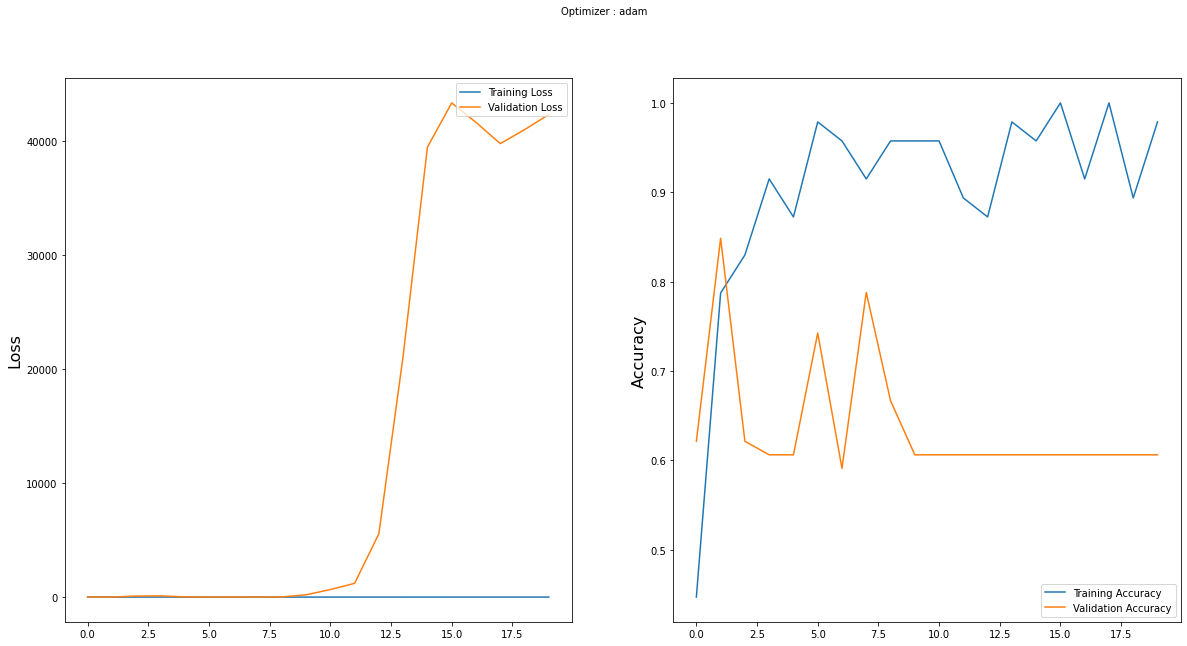

In [55]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **DenseNet201**

In [56]:
des201=DenseNet201(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

74842112/74836368 [==============================] - 0s 0us/step


In [57]:
x1= Flatten()(des201.output)
prediction1 = Dense(3, activation='softmax')(x1)
model1 = Model(inputs = des201.inputs, outputs = prediction1)
model1.summary()
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 230, 230, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [58]:
r1 = model1.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
2/2 [==============================] - 26s 6s/step - loss: 4.8556 - accuracy: 0.4683 - val_loss: 4.0230 - val_accuracy: 0.7879
Epoch 2/20
2/2 [==============================] - 2s 1s/step - loss: 1.9578 - accuracy: 0.8695 - val_loss: 2.5826 - val_accuracy: 0.8636
Epoch 3/20
2/2 [==============================] - 3s 2s/step - loss: 0.8128 - accuracy: 0.8118 - val_loss: 41.8109 - val_accuracy: 0.6818
Epoch 4/20
2/2 [==============================] - 2s 1s/step - loss: 0.8051 - accuracy: 0.8486 - val_loss: 728.5592 - val_accuracy: 0.6061
Epoch 5/20
2/2 [==============================] - 3s 2s/step - loss: 0.7697 - accuracy: 0.8785 - val_loss: 8675.5498 - val_accuracy: 0.3182
Epoch 6/20
2/2 [==============================] - 2s 1s/step - loss: 0.3774 - accuracy: 0.9016 - val_loss: 39539.9648 - val_accuracy: 0.3182
Epoch 7/20
2/2 [==============================] - 3s 2s/step - loss: 0.4357 - accuracy: 0.9130 - val_loss: 62274.8359 - val_accuracy: 0.3182
Epoch 8/20
2/2 [==========

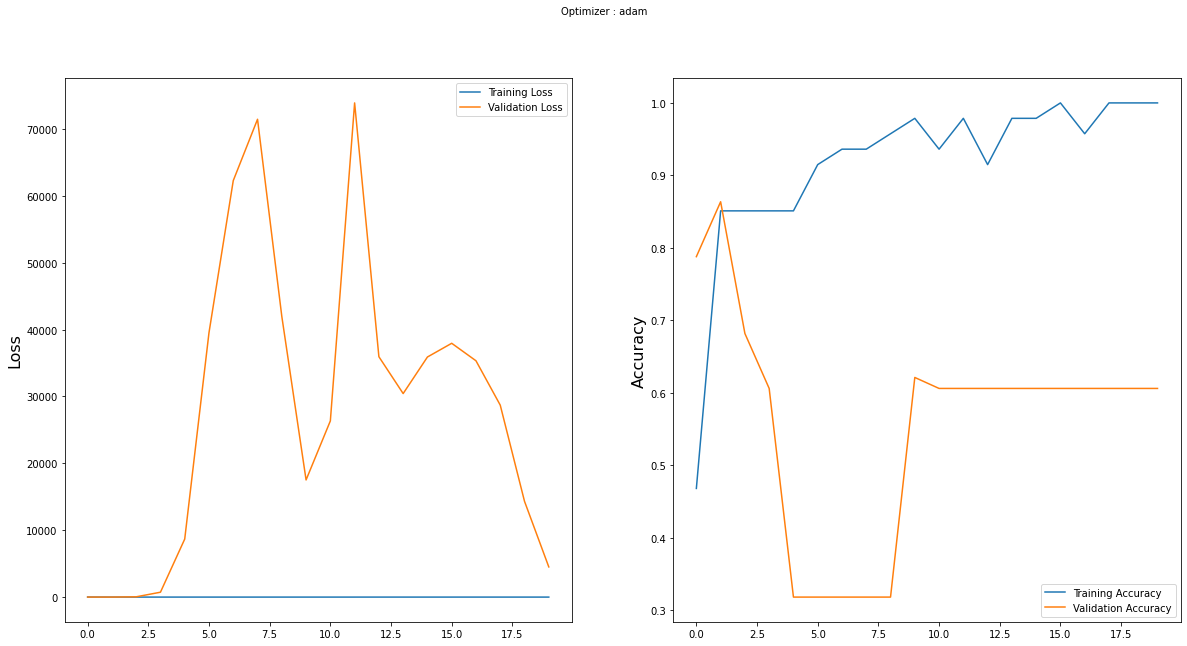

In [59]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **ResNet50V2**

In [60]:
res50V2=ResNet50V2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94674944/94668760 [==============================] - 1s 0us/step


In [61]:
x1= Flatten()(res50V2.output)
prediction1 = Dense(3, activation='softmax')(x1)
model1 = Model(inputs = res50V2.inputs, outputs = prediction1)
model1.summary()
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_11[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
___________________________________________________________________________________________

In [62]:
r1 = model1.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
2/2 [==============================] - 11s 4s/step - loss: 3.5448 - accuracy: 0.4577 - val_loss: 4.4948 - val_accuracy: 0.6818
Epoch 2/20
2/2 [==============================] - 2s 2s/step - loss: 2.0147 - accuracy: 0.7835 - val_loss: 3.1603 - val_accuracy: 0.9242
Epoch 3/20
2/2 [==============================] - 2s 2s/step - loss: 1.0917 - accuracy: 0.9149 - val_loss: 3.0867 - val_accuracy: 0.7727
Epoch 4/20
2/2 [==============================] - 2s 1s/step - loss: 0.1448 - accuracy: 0.9508 - val_loss: 27.8683 - val_accuracy: 0.6061
Epoch 5/20
2/2 [==============================] - 2s 2s/step - loss: 0.5596 - accuracy: 0.9210 - val_loss: 91.1899 - val_accuracy: 0.6061
Epoch 6/20
2/2 [==============================] - 2s 2s/step - loss: 0.3155 - accuracy: 0.8118 - val_loss: 249.3567 - val_accuracy: 0.6061
Epoch 7/20
2/2 [==============================] - 2s 2s/step - loss: 0.0908 - accuracy: 0.9716 - val_loss: 377.8781 - val_accuracy: 0.6061
Epoch 8/20
2/2 [==================

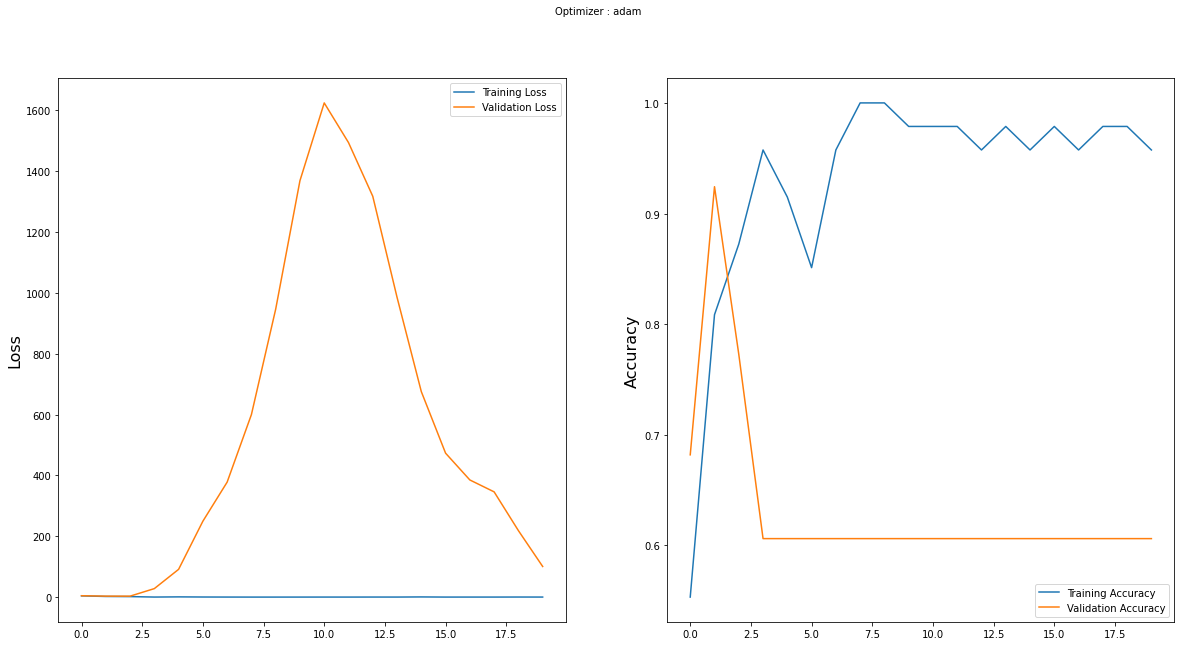

In [63]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **ResNet101V2**

In [64]:
res101V2=ResNet101V2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

171319296/171317808 [==============================] - 2s 0us/step


In [65]:
x1= Flatten()(res101V2.output)
prediction1 = Dense(3, activation='softmax')(x1)
model1 = Model(inputs = res101V2.inputs, outputs = prediction1)
model1.summary()
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_12[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
___________________________________________________________________________________________

In [66]:
r1 = model1.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
2/2 [==============================] - 14s 3s/step - loss: 1.9686 - accuracy: 0.2895 - val_loss: 5.4725 - val_accuracy: 0.8485
Epoch 2/20
2/2 [==============================] - 2s 1s/step - loss: 3.0632 - accuracy: 0.8061 - val_loss: 38.6081 - val_accuracy: 0.6515
Epoch 3/20
2/2 [==============================] - 3s 2s/step - loss: 8.7086 - accuracy: 0.7612 - val_loss: 116.6915 - val_accuracy: 0.6364
Epoch 4/20
2/2 [==============================] - 3s 2s/step - loss: 0.3111 - accuracy: 0.8988 - val_loss: 663.8430 - val_accuracy: 0.3182
Epoch 5/20
2/2 [==============================] - 2s 2s/step - loss: 0.2084 - accuracy: 0.9352 - val_loss: 1621.3353 - val_accuracy: 0.3182
Epoch 6/20
2/2 [==============================] - 2s 1s/step - loss: 0.3002 - accuracy: 0.9366 - val_loss: 1872.5142 - val_accuracy: 0.3182
Epoch 7/20
2/2 [==============================] - 3s 2s/step - loss: 0.1427 - accuracy: 0.9494 - val_loss: 1544.9346 - val_accuracy: 0.4545
Epoch 8/20
2/2 [==========

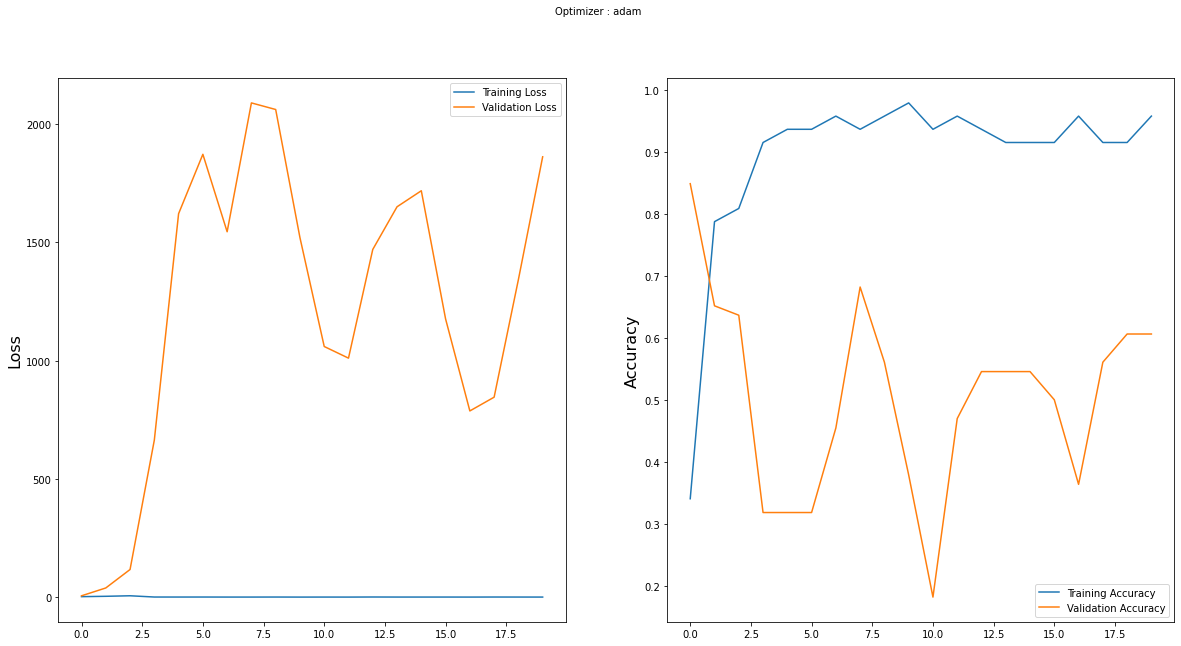

In [67]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **ResNet152V2**

In [68]:
res152V2=ResNet152V2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

234553344/234545216 [==============================] - 1s 0us/step


In [69]:
x1= Flatten()(res152V2.output)
prediction1 = Dense(3, activation='softmax')(x1)
model1 = Model(inputs = res152V2.inputs, outputs = prediction1)
model1.summary()
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_13[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
___________________________________________________________________________________________

In [70]:
r1 = model1.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
2/2 [==============================] - 19s 5s/step - loss: 2.0606 - accuracy: 0.4512 - val_loss: 3.1276 - val_accuracy: 0.5455
Epoch 2/20
2/2 [==============================] - 3s 2s/step - loss: 1.9586 - accuracy: 0.7976 - val_loss: 89.1293 - val_accuracy: 0.3182
Epoch 3/20
2/2 [==============================] - 3s 1s/step - loss: 1.1508 - accuracy: 0.8553 - val_loss: 1893.6040 - val_accuracy: 0.6061
Epoch 4/20
2/2 [==============================] - 3s 2s/step - loss: 0.6565 - accuracy: 0.8643 - val_loss: 411980.2188 - val_accuracy: 0.6061
Epoch 5/20
2/2 [==============================] - 3s 2s/step - loss: 0.5158 - accuracy: 0.8643 - val_loss: 29796360.0000 - val_accuracy: 0.6061
Epoch 6/20
2/2 [==============================] - 3s 2s/step - loss: 1.2953 - accuracy: 0.8421 - val_loss: 2161697536.0000 - val_accuracy: 0.6061
Epoch 7/20
2/2 [==============================] - 3s 2s/step - loss: 0.4718 - accuracy: 0.8643 - val_loss: 158113923072.0000 - val_accuracy: 0.6061
Epoc

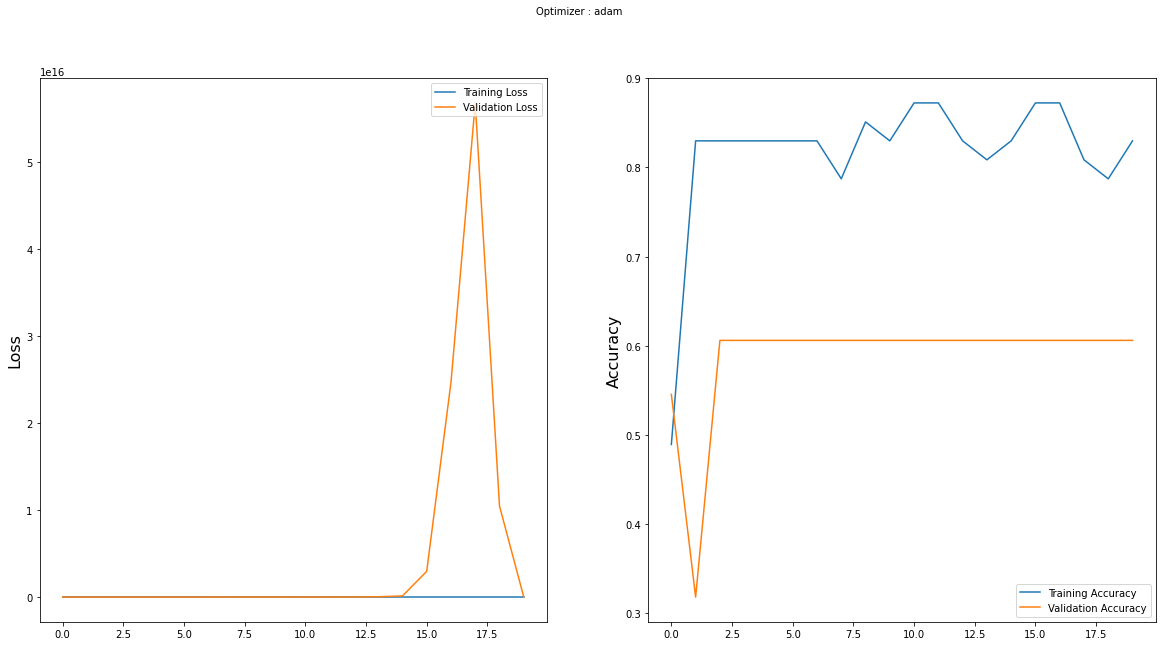

In [71]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()